<a href="https://colab.research.google.com/github/Vanaja146/Backend/blob/main/Copy_of_IDP_Dragon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rarfile


In [ ]:
import rarfile
import os

rar_path = "/content/drive/MyDrive/Dragon Fruit Quality Grading Dataset (1).rar"
extract_path = "/content/dataset"

os.makedirs(extract_path, exist_ok=True)

with rarfile.RarFile(rar_path, 'r') as rf:
    rf.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [ ]:
print(f"Dataset extracted to: {extract_path}\n")

Dataset extracted to: /content/dataset



In [ ]:
print("\nExtracted files and folders:")
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print(os.path.join(root, file))


Extracted files and folders:
/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit/Fresh_Dragon_Augmented_Data0069.jpg
/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit/Fresh_Dragon_Augmented_Data0128.jpg
/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit/Fresh_Dragon_Augmented_Data0146.jpg
/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit/Fresh_Dragon_Augmented_Data0081.jpg
/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit/Fresh_Dragon_Augmented_Data0162.jpg
/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit/Fresh_Dragon_Augmented_Data0116.jpg
/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit/Fresh_Dragon_Augmented_Data0050.jpg
/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dra

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import numpy as np

fresh_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit"
augmented_path = "/content/dataset/Augmented_Fresh_Dragon_Fruit"

os.makedirs(augmented_path, exist_ok=True)

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Load and augment images
for img_name in os.listdir(fresh_path):
    img_path = os.path.join(fresh_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.expand_dims(img, axis=0)

    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=augmented_path, save_prefix="aug", save_format="jpg"):
        i += 1
        if i >= 15:  # Generate 15 new images per original image
            break

print("Augmentation complete! ✅")


Augmentation complete! ✅


In [ ]:
import os

# Define paths
defect_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Defect Dragon Fruit"
fresh_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit"
augmented_path = "/content/dataset/Augmented_Fresh_Dragon_Fruit"

# Count images
num_defect = len(os.listdir(defect_path))
num_fresh_original = len(os.listdir(fresh_path))
num_fresh_augmented = len(os.listdir(augmented_path))  # Fixed variable name

# Total fresh images after augmentation
total_fresh_images = num_fresh_original + num_fresh_augmented

# Print results
print(f"📌 Defect Dragon Fruit: {num_defect} images")
print(f"📌 Fresh Dragon Fruit (Original): {num_fresh_original} images")
print(f"📌 Fresh Dragon Fruit (Augmented): {num_fresh_augmented} images")
print(f"✅ Total Fresh Dragon Fruit Images (After Augmentation): {total_fresh_images}")


📌 Defect Dragon Fruit: 3000 images
📌 Fresh Dragon Fruit (Original): 181 images
📌 Fresh Dragon Fruit (Augmented): 2379 images
✅ Total Fresh Dragon Fruit Images (After Augmentation): 2560


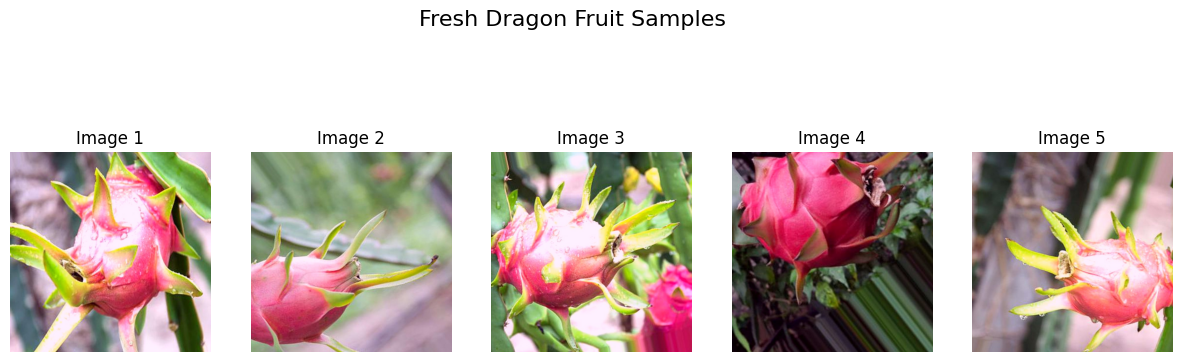

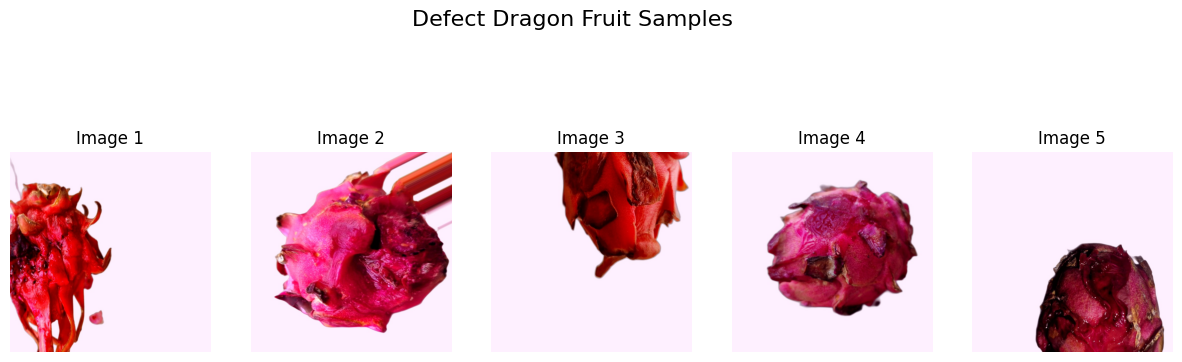

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Define paths
defect_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Defect Dragon Fruit"
fresh_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit"

# Function to load and display random images
def display_random_images(category_path, category_name, num_images=5):
    image_files = os.listdir(category_path)
    random_images = random.sample(image_files, min(num_images, len(image_files)))  # Select random images

    fig, axes = plt.subplots(1, len(random_images), figsize=(15, 5))
    fig.suptitle(f"{category_name} Samples", fontsize=16)

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display

        axes[i].imshow(img)
        axes[i].axis("off")  # Hide axis
        axes[i].set_title(f"Image {i+1}")

    plt.show()

# Display random images from each category
display_random_images(fresh_path, "Fresh Dragon Fruit", num_images=5)
display_random_images(defect_path, "Defect Dragon Fruit", num_images=5)


In [ ]:
import os
import cv2
import numpy as np

# Define dataset paths
defect_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Defect Dragon Fruit"
original_fresh_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit"
augmented_fresh_path = "/content/dataset/Augmented_Fresh_Dragon_Fruit"  # Augmented images folder

# Function to get all image paths from a folder
def get_image_paths(folder_path):
    if not os.path.exists(folder_path):  # Ensure folder exists
        return []
    return [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

# Get image lists
defect_images = get_image_paths(defect_path)
original_fresh_images = get_image_paths(original_fresh_path)
augmented_fresh_images = get_image_paths(augmented_fresh_path)

# Combine fresh images (original + augmented)
fresh_images = original_fresh_images + augmented_fresh_images

# Function to get dataset size in MB
def get_dataset_size(image_list, category):
    total_size = sum(os.path.getsize(img) for img in image_list)  # Get size in bytes
    size_in_mb = total_size / (1024 * 1024)  # Convert bytes to MB
    print(f"\n📌 {category}:")
    print(f"   🔹 Total Images: {len(image_list)}")
    print(f"   🔹 Total Size: {size_in_mb:.2f} MB")

# Function to compute image shape statistics
def compute_shape_statistics(image_list, category):
    heights, widths, channels = [], [], []

    for img_path in image_list:
        img = cv2.imread(img_path)
        if img is not None:
            h, w, c = img.shape
            heights.append(h)
            widths.append(w)
            channels.append(c)

    if heights and widths:
        print(f"\n📊 Statistics for {category}:")
        print(f"   🔹 Min Shape: ({min(heights)}, {min(widths)}, {min(channels)})")
        print(f"   🔹 Max Shape: ({max(heights)}, {max(widths)}, {max(channels)})")
        print(f"   🔹 Average Shape: ({int(np.mean(heights))}, {int(np.mean(widths))}, {int(np.mean(channels))})")
    else:
        print(f"\n❌ No valid images found in {category}.")

# Compute dataset size and shape statistics
for category, image_list in [("Defect Dragon Fruit", defect_images),
                             ("Fresh Dragon Fruit (Original + Augmented)", fresh_images)]:
    get_dataset_size(image_list, category)
    compute_shape_statistics(image_list, category)

# Verify total fresh images count
print(f"\n✅ Final Fresh Dragon Fruit Count: {len(fresh_images)} images (181 original + 2388 augmented)")



📌 Defect Dragon Fruit:
   🔹 Total Images: 3000
   🔹 Total Size: 201.21 MB

📊 Statistics for Defect Dragon Fruit:
   🔹 Min Shape: (800, 800, 3)
   🔹 Max Shape: (800, 800, 3)
   🔹 Average Shape: (800, 800, 3)

📌 Fresh Dragon Fruit (Original + Augmented):
   🔹 Total Images: 2560
   🔹 Total Size: 145.11 MB

📊 Statistics for Fresh Dragon Fruit (Original + Augmented):
   🔹 Min Shape: (800, 800, 3)
   🔹 Max Shape: (800, 800, 3)
   🔹 Average Shape: (800, 800, 3)

✅ Final Fresh Dragon Fruit Count: 2560 images (181 original + 2388 augmented)


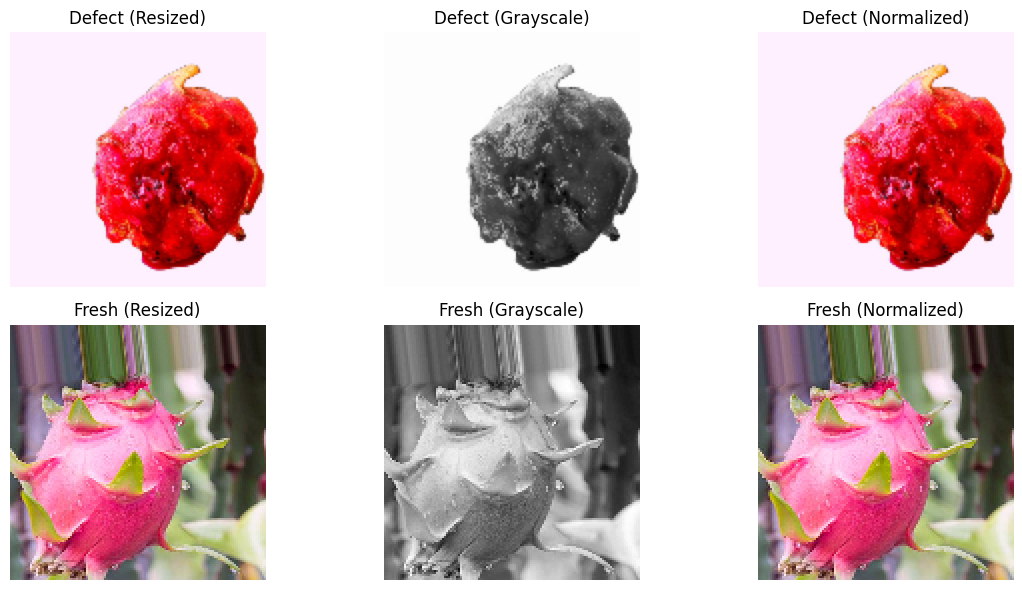

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define dataset paths
defect_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Defect Dragon Fruit"
fresh_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit"

# Get list of image files
defect_images = [os.path.join(defect_path, img) for img in os.listdir(defect_path)]
fresh_images = [os.path.join(fresh_path, img) for img in os.listdir(fresh_path)]

# Function to preprocess image (resize, grayscale, normalize)
def preprocess_image(img_path, size=(128, 128)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img_resized = cv2.resize(img, size)  # Resize
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)  # Convert to Grayscale

    # Normalize both RGB and grayscale images
    img_normalized = img_resized / 255.0
    img_gray_normalized = img_gray / 255.0

    return img_resized, img_gray_normalized, img_normalized

# Select random images from each category
sample_defect = np.random.choice(defect_images)
sample_fresh = np.random.choice(fresh_images)

# Preprocess images
defect_resized, defect_gray, defect_norm = preprocess_image(sample_defect)
fresh_resized, fresh_gray, fresh_norm = preprocess_image(sample_fresh)

# Display images
plt.figure(figsize=(12, 6))

# Defective Images
plt.subplot(2, 3, 1); plt.imshow(defect_resized); plt.title("Defect (Resized)"); plt.axis("off")
plt.subplot(2, 3, 2); plt.imshow(defect_gray, cmap="gray"); plt.title("Defect (Grayscale)"); plt.axis("off")
plt.subplot(2, 3, 3); plt.imshow(defect_norm); plt.title("Defect (Normalized)"); plt.axis("off")

# Fresh Images
plt.subplot(2, 3, 4); plt.imshow(fresh_resized); plt.title("Fresh (Resized)"); plt.axis("off")
plt.subplot(2, 3, 5); plt.imshow(fresh_gray, cmap="gray"); plt.title("Fresh (Grayscale)"); plt.axis("off")
plt.subplot(2, 3, 6); plt.imshow(fresh_norm); plt.title("Fresh (Normalized)"); plt.axis("off")

plt.tight_layout()
plt.show()


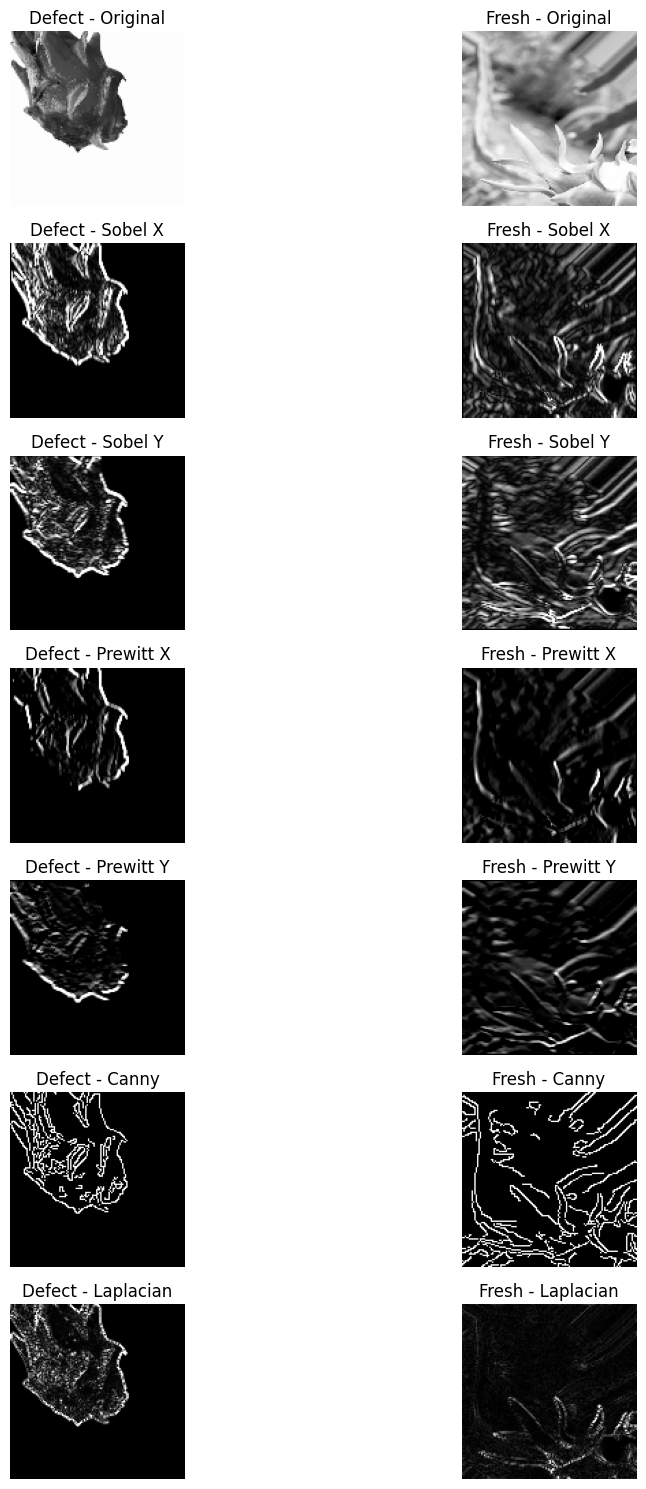

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
defect_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Defect Dragon Fruit"
fresh_path = "/content/dataset/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit"

# Get list of image files
defect_images = [os.path.join(defect_path, img) for img in os.listdir(defect_path)]
fresh_images = [os.path.join(fresh_path, img) for img in os.listdir(fresh_path)]

# Function to preprocess and apply edge detection
def preprocess_and_detect_edges(img_path, size=(128, 128)):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    img_resized = cv2.resize(img, size)  # Resize

    # Sobel Edge Detection
    sobelx = cv2.Sobel(img_resized, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_resized, cv2.CV_64F, 0, 1, ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)  # Convert to absolute
    sobely = cv2.convertScaleAbs(sobely)

    # Prewitt Edge Detection (Custom Kernel)
    prewittx = cv2.filter2D(img_resized, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitty = cv2.filter2D(img_resized, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))

    # Canny Edge Detection
    canny = cv2.Canny(img_resized, 100, 200)

    # Laplacian Edge Detection
    laplacian = cv2.Laplacian(img_resized, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)

    return img_resized, sobelx, sobely, prewittx, prewitty, canny, laplacian

# Select random images
sample_defect = np.random.choice(defect_images)
sample_fresh = np.random.choice(fresh_images)

# Process images
defect_resized, sobelx_def, sobely_def, prewittx_def, prewitty_def, canny_def, laplacian_def = preprocess_and_detect_edges(sample_defect)
fresh_resized, sobelx_fresh, sobely_fresh, prewittx_fresh, prewitty_fresh, canny_fresh, laplacian_fresh = preprocess_and_detect_edges(sample_fresh)

# Display images
fig, axes = plt.subplots(7, 2, figsize=(12, 15))  # 7 rows, 2 columns
titles = ["Original", "Sobel X", "Sobel Y", "Prewitt X", "Prewitt Y", "Canny", "Laplacian"]

for i, (img_def, img_fresh, title) in enumerate(zip(
    [defect_resized, sobelx_def, sobely_def, prewittx_def, prewitty_def, canny_def, laplacian_def],
    [fresh_resized, sobelx_fresh, sobely_fresh, prewittx_fresh, prewitty_fresh, canny_fresh, laplacian_fresh],
    titles
)):
    axes[i, 0].imshow(img_def, cmap="gray")
    axes[i, 0].set_title(f"Defect - {title}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(img_fresh, cmap="gray")
    axes[i, 1].set_title(f"Fresh - {title}")
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Define dataset paths


# Get all image paths
defect_images = [os.path.join(defect_path, img) for img in os.listdir(defect_path)]
fresh_images = [os.path.join(fresh_path, img) for img in os.listdir(fresh_path)]

# Split dataset (80% Train, 20% Validation)
defect_train, defect_val = train_test_split(defect_images, test_size=0.2, random_state=42)
fresh_train, fresh_val = train_test_split(fresh_images, test_size=0.2, random_state=42)

# Create train/val directories
base_dir = "dataset_split"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

for category in ["Defect", "Fresh"]:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

# Function to copy images to train/val directories
def copy_images(image_list, dest_folder):
    for img_path in image_list:
        shutil.copy(img_path, os.path.join(dest_folder, os.path.basename(img_path)))

# Copy images into respective train/val folders
copy_images(defect_train, os.path.join(train_dir, "Defect"))
copy_images(defect_val, os.path.join(val_dir, "Defect"))
copy_images(fresh_train, os.path.join(train_dir, "Fresh"))
copy_images(fresh_val, os.path.join(val_dir, "Fresh"))

print("Dataset split completed!")


Dataset split completed!


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [ ]:
# Define dataset paths
#defect_path = "/kaggle/input/dragon/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Defect Dragon Fruit"
#fresh_path = "/kaggle/input/dragon/Dragon Fruit Quality Grading Dataset/Augmented Dataset/Fresh Dragon Fruit"

# Function to preprocess images
def preprocess_image(img_path, size=(128, 128), edge_detect=False):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
    img = cv2.resize(img, size)  # Resize

    if edge_detect:
        img = cv2.Canny(img, 100, 200)  # Apply Canny edge detection

    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (grayscale)

    return img

# Load images
def load_dataset(path, label, edge_detect=False):
    images, labels = [], []
    for img_name in tqdm(os.listdir(path), desc=f"Loading {label} {'(Edge)' if edge_detect else '(Original)'}"):
        img_path = os.path.join(path, img_name)
        images.append(preprocess_image(img_path, edge_detect=edge_detect))
        labels.append(0 if label == "Defect" else 1)

    return np.array(images), np.array(labels)

# Load original images
X_defect, y_defect = load_dataset(defect_path, "Defect", edge_detect=False)
X_fresh, y_fresh = load_dataset(fresh_path, "Fresh", edge_detect=False)

# Load edge-detected images
X_defect_edge, y_defect_edge = load_dataset(defect_path, "Defect", edge_detect=True)
X_fresh_edge, y_fresh_edge = load_dataset(fresh_path, "Fresh", edge_detect=True)

# Combine both datasets
X_original = np.concatenate([X_defect, X_fresh])
y_original = np.concatenate([y_defect, y_fresh])

X_edges = np.concatenate([X_defect_edge, X_fresh_edge])
y_edges = np.concatenate([y_defect_edge, y_fresh_edge])

# Split into train-test (80% train, 20% test)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_edge, X_test_edge, y_train_edge, y_test_edge = train_test_split(X_edges, y_edges, test_size=0.2, random_state=42)

# Expand dimensions for CNN input (Batch, Width, Height, Channels)
X_train_orig = np.expand_dims(X_train_orig, axis=-1)
X_test_orig = np.expand_dims(X_test_orig, axis=-1)
X_train_edge = np.expand_dims(X_train_edge, axis=-1)
X_test_edge = np.expand_dims(X_test_edge, axis=-1)


Loading Fresh (Edge): 100%|██████████| 181/181 [00:00<00:00, 271.51it/s]


In [ ]:
def build_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Binary classification (Defect / Fresh)
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
model_orig = build_cnn()
model_orig.summary()
history_orig = model_orig.fit(X_train_orig, y_train_orig, epochs=10, validation_data=(X_test_orig, y_test_orig), batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9324 - loss: 0.2373 - val_accuracy: 0.9513 - val_loss: 0.0887
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9651 - loss: 0.0773 - val_accuracy: 0.9749 - val_loss: 0.0700
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9764 - loss: 0.0636 - val_accuracy: 0.9765 - val_loss: 0.0668
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9788 - loss: 0.0570 - val_accuracy: 0.9843 - val_loss: 0.0347
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9820 - loss: 0.0389 - val_accuracy: 0.9906 - val_loss: 0.0311
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9869 - loss: 0.0327 - val_accuracy: 0.9874 - val_loss: 0.0338
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9853 - loss: 0.0398 - val_accuracy: 0.9859 - val_loss: 0.0392
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9853 - loss: 0.0468 - val_accuracy: 0.9812 - 

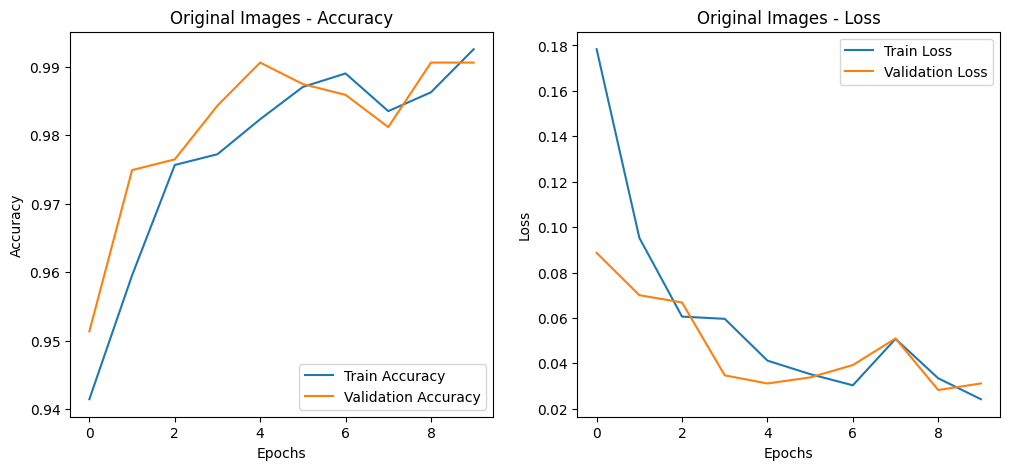

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history_orig, "Original Images")



20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Confusion Matrix:
 [[599   5]
 [  1  32]]
Accuracy:  0.9906
Precision: 0.8649
Recall:    0.9697
F1 Score:  0.9143


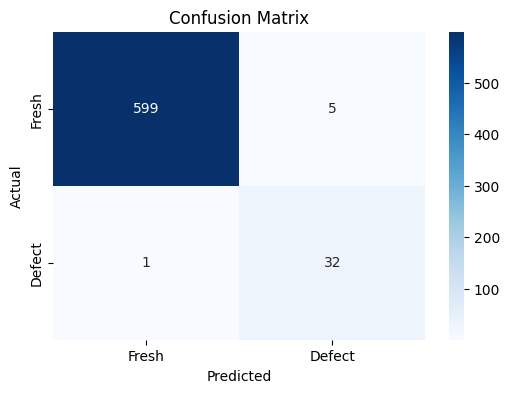

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred_probs = model_orig.predict(X_test_orig)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Evaluation
cm = confusion_matrix(y_test_orig, y_pred)
acc = accuracy_score(y_test_orig, y_pred)
prec = precision_score(y_test_orig, y_pred)
rec = recall_score(y_test_orig, y_pred)
f1 = f1_score(y_test_orig, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fresh', 'Defect'], yticklabels=['Fresh', 'Defect'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
orig_test_acc = model_orig.evaluate(X_test_orig, y_test_orig, verbose=0)[1]


print(f"Test Accuracy (Original Images): {orig_test_acc * 100:.2f}%")



Test Accuracy (Original Images): 99.06%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


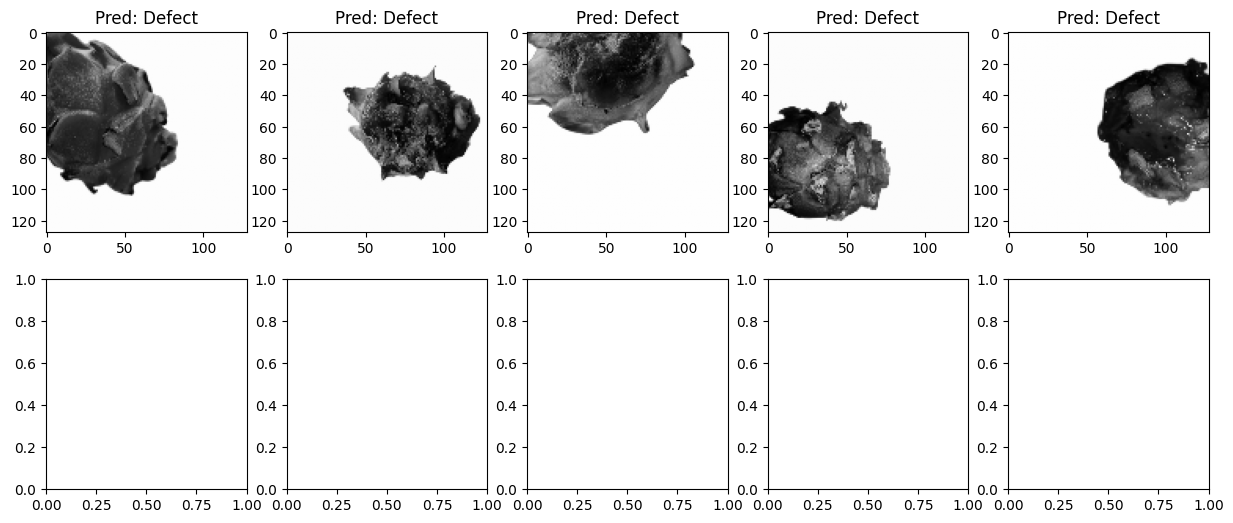

In [ ]:
# Select random test images
rand_idx = np.random.randint(0, len(X_test_orig), 5)
test_images_orig = X_test_orig[rand_idx]


# Predict
pred_orig = model_orig.predict(test_images_orig)

# Convert predictions to labels
pred_labels_orig = ["Fresh" if p > 0.5 else "Defect" for p in pred_orig]


# Display predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    axes[0, i].imshow(test_images_orig[i].reshape(128, 128), cmap="gray")
    axes[0, i].set_title(f"Pred: {pred_labels_orig[i]}")




plt.show()


Found 2544 images belonging to 2 classes.
Found 637 images belonging to 2 classes.
Training a new model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 43s 351ms/step - accuracy: 0.8955 - loss: 0.3556 - val_accuracy: 0.9419 - val_loss: 0.2056
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.9419 - loss: 0.2108 - val_accuracy: 0.9419 - val_loss: 0.1809
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.9455 - loss: 0.1747 - val_accuracy: 0.9419 - val_loss: 0.1577
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 181ms/step - accuracy: 0.9465 - loss: 0.1588 - val_accuracy: 0.9419 - val_loss: 0.1436
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.9424 - loss: 0.1496 - val_accuracy: 0.9419 - val_loss: 0.1300
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.9396 - loss: 0.1399 - val_accuracy: 0.9419 - val_loss: 0.1216
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - accuracy: 0.9510 - loss: 0.1246 - val_accuracy: 0.9419 - val_loss: 0.1118
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.9482 - loss: 0.1166 - val_accu

Model saved as resnet_model.h5


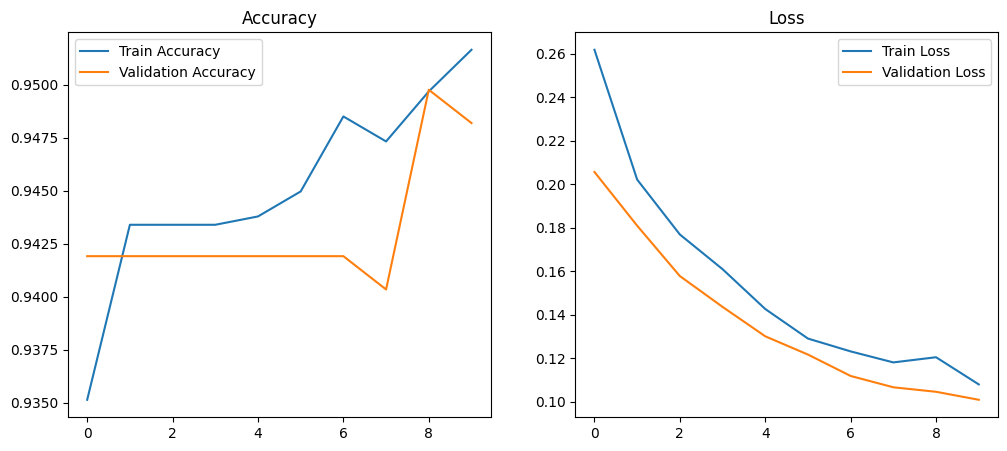

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


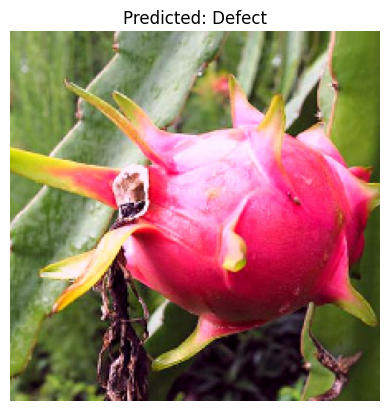

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset directories
train_dir = "dataset_split/train"
val_dir = "dataset_split/val"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
MODEL_PATH = "resnet_model.h5"  # Path to save/load model

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Check if a trained model already exists
if os.path.exists(MODEL_PATH):
    print("Loading existing model...")
    model = load_model(MODEL_PATH)
else:
    print("Training a new model...")

    # Load Pretrained ResNet50 model
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers

    # Custom layers
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

    # Save trained model
    model.save(MODEL_PATH)
    print(f"Model saved as {MODEL_PATH}")

    # Plot Accuracy & Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

# Prediction on a sample image
sample_img_path = np.random.choice(train_generator.filepaths)
sample_img = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=IMG_SIZE)
sample_array = tf.keras.preprocessing.image.img_to_array(sample_img) / 255.0
sample_array = np.expand_dims(sample_array, axis=0)

prediction = model.predict(sample_array)
label = "Fresh" if prediction[0][0] > 0.5 else "Defect"

plt.imshow(sample_img)
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Defect       0.94      0.99      0.97       600
       Fresh       0.12      0.03      0.04        37

    accuracy                           0.93       637
   macro avg       0.53      0.51      0.50       637
weighted avg       0.90      0.93      0.91       637



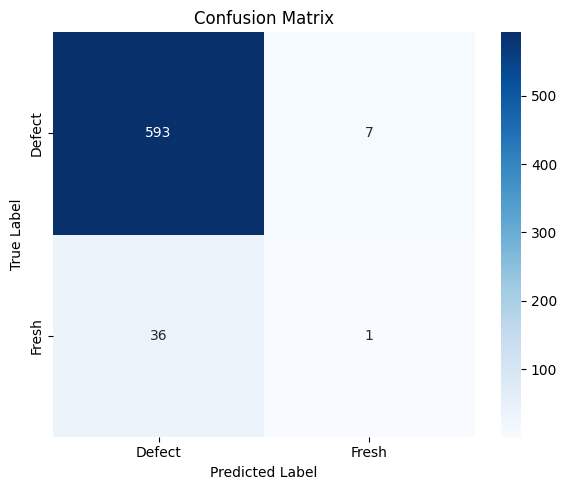

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Predict on validation set
val_generator.reset()
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 2: Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Defect", "Fresh"]))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Defect", "Fresh"], yticklabels=["Defect", "Fresh"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Found 2544 images belonging to 2 classes.
Found 637 images belonging to 2 classes.
Training a new model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 317ms/step - accuracy: 0.9650 - loss: 0.1176 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9959 - loss: 0.0088 - val_accuracy: 0.9969 - val_loss: 0.0066
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.9984 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9985 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - accuracy: 1.0000 - loss: 5.5746e-04 - val_accuracy: 0.9984 - val_loss: 0.0018
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.9999 - loss: 8.1694e-04 - val_accuracy: 0.9984 - val_loss: 0.0026
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.9998 - loss: 0.0010 - val_accuracy: 0.9984 - val_loss: 0.0044
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9990 - loss: 0.0027 - 

Model saved as mobilenet_model.h5


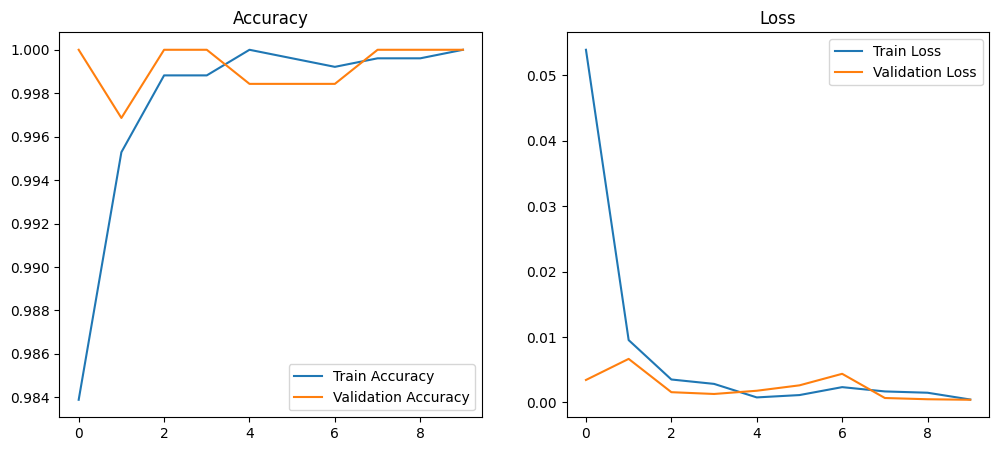

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


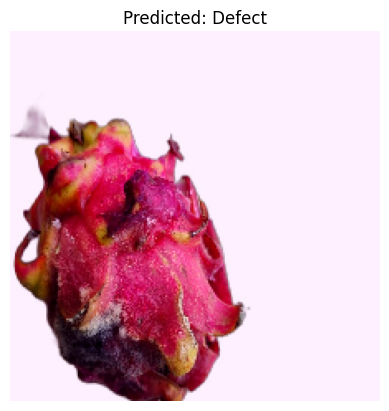

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset directories
train_dir = "dataset_split/train"
val_dir = "dataset_split/val"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
MODEL_PATH = "mobilenet_model.h5"  # Path to save/load model

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Check if a trained model already exists
if os.path.exists(MODEL_PATH):
    print("Loading existing model...")
    model = load_model(MODEL_PATH)
else:
    print("Training a new model...")

    # Load Pretrained MobileNetV2 model
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers

    # Custom layers
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

    # Save trained model
    model.save(MODEL_PATH)
    print(f"Model saved as {MODEL_PATH}")

    # Plot Accuracy & Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

# Prediction on a sample image
sample_img_path = np.random.choice(train_generator.filepaths)
sample_img = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=IMG_SIZE)
sample_array = tf.keras.preprocessing.image.img_to_array(sample_img) / 255.0
sample_array = np.expand_dims(sample_array, axis=0)

prediction = model.predict(sample_array)
label = "Fresh" if prediction[0][0] > 0.5 else "Defect"

plt.imshow(sample_img)
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 271ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Defect       0.94      0.94      0.94       600
       Fresh       0.08      0.08      0.08        37

    accuracy                           0.89       637
   macro avg       0.51      0.51      0.51       637
weighted avg       0.89      0.89      0.89       637



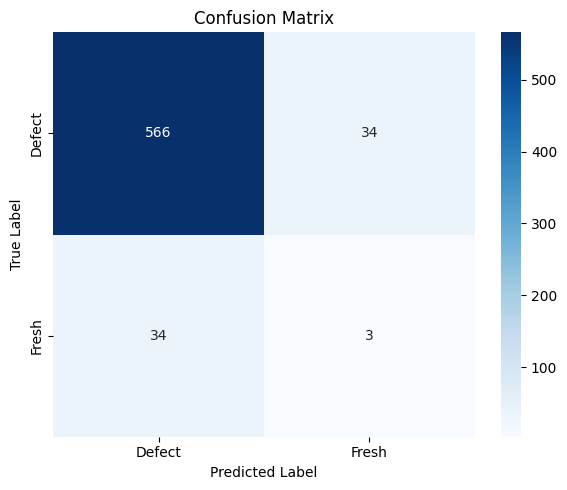

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Predict on validation set
val_generator.reset()
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 2: Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Defect", "Fresh"]))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Defect", "Fresh"], yticklabels=["Defect", "Fresh"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Found 2544 images belonging to 2 classes.
Found 637 images belonging to 2 classes.
Training a new model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 465ms/step - accuracy: 0.8673 - loss: 0.3092 - val_accuracy: 0.9717 - val_loss: 0.0557
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 221ms/step - accuracy: 0.9854 - loss: 0.0469 - val_accuracy: 0.9843 - val_loss: 0.0380
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 216ms/step - accuracy: 0.9926 - loss: 0.0273 - val_accuracy: 0.9874 - val_loss: 0.0336
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 216ms/step - accuracy: 0.9947 - loss: 0.0212 - val_accuracy: 0.9874 - val_loss: 0.0312
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.9954 - loss: 0.0133 - val_accuracy: 0.9890 - val_loss: 0.0293
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 218ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9890 - val_loss: 0.0284
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 241ms/step - accuracy: 0.9914 - loss: 0.0239 - val_accuracy: 0.9874 - val_loss: 0.0258
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 216ms/step - accuracy: 0.9919 - loss: 0.0214 - val_accu

Model saved as vgg_model.h5


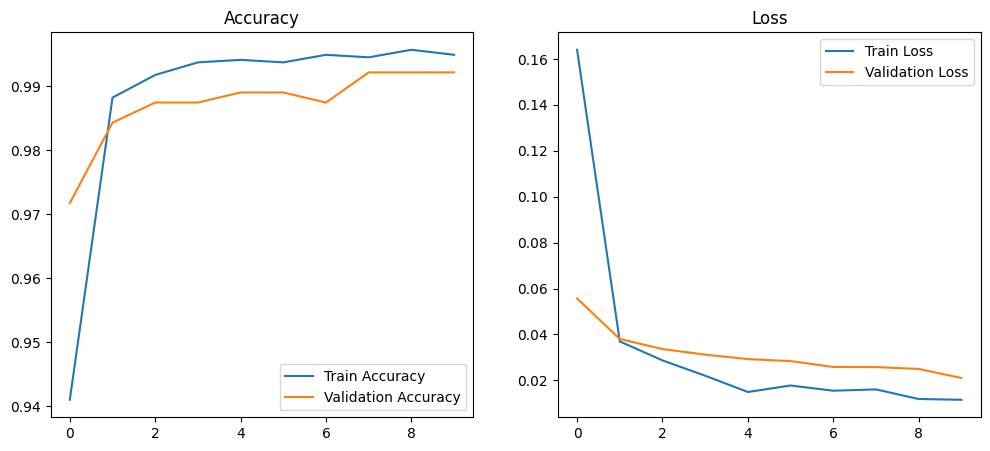

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


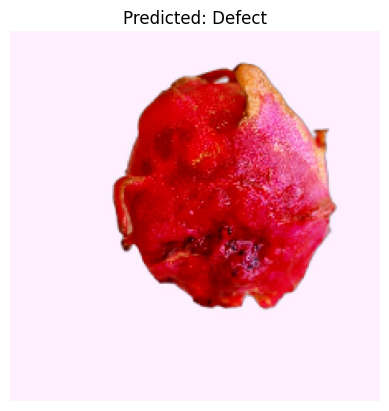

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset directories
train_dir = "dataset_split/train"
val_dir = "dataset_split/val"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
MODEL_PATH = "vgg_model.h5"  # Path to save/load model

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Check if a trained model already exists
if os.path.exists(MODEL_PATH):
    print("Loading existing model...")
    model = load_model(MODEL_PATH)
else:
    print("Training a new model...")

    # Load Pretrained VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers

    # Custom layers
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

    # Save trained model
    model.save(MODEL_PATH)
    print(f"Model saved as {MODEL_PATH}")

    # Plot Accuracy & Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

# Prediction on a sample image
sample_img_path = np.random.choice(train_generator.filepaths)
sample_img = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=IMG_SIZE)
sample_array = tf.keras.preprocessing.image.img_to_array(sample_img) / 255.0
sample_array = np.expand_dims(sample_array, axis=0)

prediction = model.predict(sample_array)
label = "Fresh" if prediction[0][0] > 0.5 else "Defect"

plt.imshow(sample_img)
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Defect       0.94      0.94      0.94       600
       Fresh       0.10      0.11      0.10        37

    accuracy                           0.89       637
   macro avg       0.52      0.52      0.52       637
weighted avg       0.90      0.89      0.89       637



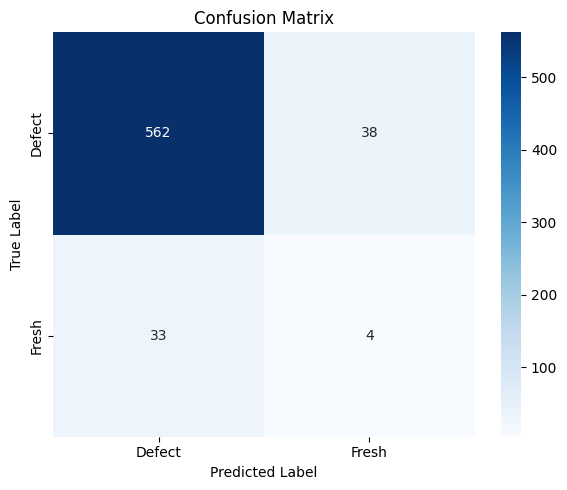

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Predict on validation set
val_generator.reset()
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 2: Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Defect", "Fresh"]))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Defect", "Fresh"], yticklabels=["Defect", "Fresh"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


Found 2544 images belonging to 2 classes.
Found 637 images belonging to 2 classes.
Training a new model...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 76s 630ms/step - accuracy: 0.9307 - loss: 0.1544 - val_accuracy: 0.9843 - val_loss: 0.0315
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - accuracy: 0.9915 - loss: 0.0280 - val_accuracy: 0.9922 - val_loss: 0.0234
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 265ms/step - accuracy: 0.9949 - loss: 0.0191 - val_accuracy: 0.9937 - val_loss: 0.0119
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - accuracy: 0.9961 - loss: 0.0116 - val_accuracy: 0.9953 - val_loss: 0.0091
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - accuracy: 0.9979 - loss: 0.0062 - val_accuracy: 0.9984 - val_loss: 0.0082
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 244ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9984 - val_loss: 0.0057
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.9971 - loss: 0.0070 - val_accuracy: 0.9984 - val_loss: 0.0053
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 228ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accu

Model saved as inception_model.h5


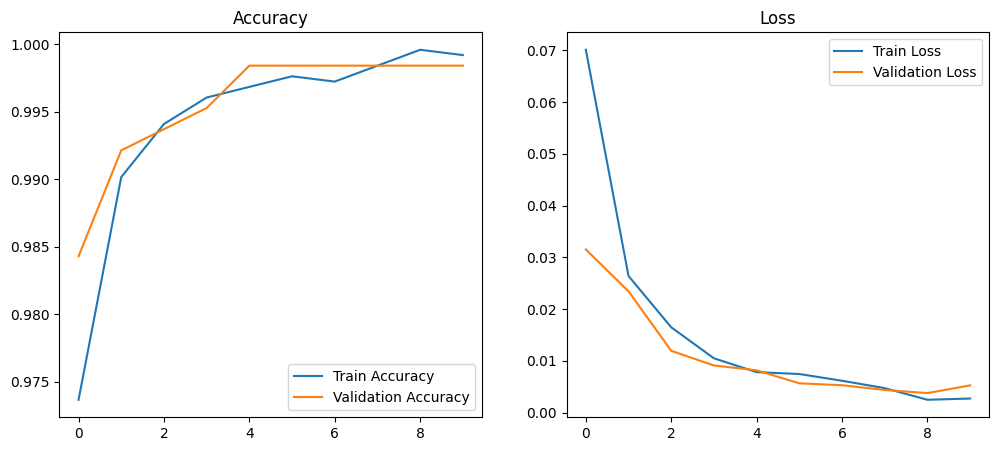

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/Augmented_Fresh_Dragon_Fruit/aug_0_1015.jpg'

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset directories
train_dir = "dataset_split/train"
val_dir = "dataset_split/val"

# Image parameters
IMG_SIZE = (299, 299)  # InceptionV3 requires 299x299 input size
BATCH_SIZE = 32
MODEL_PATH = "inception_model.h5"  # Path to save/load model

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Check if a trained model already exists
if os.path.exists(MODEL_PATH):
    print("Loading existing model...")
    model = load_model(MODEL_PATH)
else:
    print("Training a new model...")

    # Load Pretrained InceptionV3 model
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze base model layers

    # Custom layers
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(train_generator, validation_data=val_generator, epochs=10)

    # Save trained model
    model.save(MODEL_PATH)
    print(f"Model saved as {MODEL_PATH}")

    # Plot Accuracy & Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

# Prediction on a sample image
sample_img_path = "/content/dataset/Augmented_Fresh_Dragon_Fruit/aug_0_1015.jpg"
sample_img = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=IMG_SIZE)
sample_array = tf.keras.preprocessing.image.img_to_array(sample_img) / 255.0
sample_array = np.expand_dims(sample_array, axis=0)

prediction = model.predict(sample_array)
label = "Fresh" if prediction[0][0] > 0.5 else "Defect"

plt.imshow(sample_img)
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()


20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 528ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Defect       0.95      0.95      0.95       600
       Fresh       0.11      0.11      0.11        37

    accuracy                           0.90       637
   macro avg       0.53      0.53      0.53       637
weighted avg       0.90      0.90      0.90       637



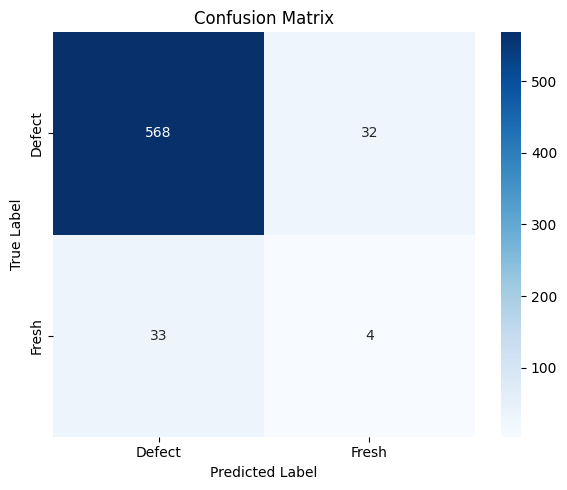

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Predict on validation set
val_generator.reset()
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 2: Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Defect", "Fresh"]))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Defect", "Fresh"], yticklabels=["Defect", "Fresh"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Average,Maximum

# Define input layer with explicit shape
input_layer = Input(shape=(224, 224, 3))

# Load pre-trained models with defined input shape
resnet = tf.keras.applications.ResNet50(weights="imagenet", include_top=False, pooling="avg", input_tensor=input_layer)
mobilenet = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_tensor=input_layer)
vgg = tf.keras.applications.VGG16(weights="imagenet", include_top=False, pooling="avg", input_tensor=input_layer)
inception = tf.keras.applications.InceptionV3(weights="imagenet", include_top=False, pooling="avg", input_tensor=input_layer)

# Freeze layers to prevent re-training
for model in [resnet, mobilenet, vgg, inception]:
    model.trainable = False

# Convert all features to the same size (512)
resnet_features = Dense(512, activation="relu")(resnet.output)
mobilenet_features = Dense(512, activation="relu")(mobilenet.output)
vgg_features = Dense(512, activation="relu")(vgg.output)
inception_features = Dense(512, activation="relu")(inception.output)

# Combine outputs using averaging
merged_output = Maximum()([resnet_features, mobilenet_features, vgg_features, inception_features])

# Final dense layer for classification
final_output = Dense(1, activation="sigmoid")(merged_output)

# Create ensemble model
ensemble_model = Model(inputs=input_layer, outputs=final_output)

# Compile model
ensemble_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Save model
ensemble_model.save("ensemble_model.h5")


<ipython-input-32-59dbf41992c6>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_tensor=input_layer)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Predict on validation set
val_generator.reset()
y_true = val_generator.classes
y_pred_probs = ensemble_model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 2: Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Defect", "Fresh"]))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Defect", "Fresh"], yticklabels=["Defect", "Fresh"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


ValueError: Input 0 of layer "functional_5" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 299, 299, 3)

Found 2544 images belonging to 2 classes.
Found 637 images belonging to 2 classes.


<ipython-input-36-6e4f355c838f>:41: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False,
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 686ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Defect       0.95      0.44      0.60       600
       Fresh       0.06      0.59      0.11        37

    accuracy                           0.45       637
   macro avg       0.50      0.52      0.35       637
weighted avg       0.89      0.45      0.57       637



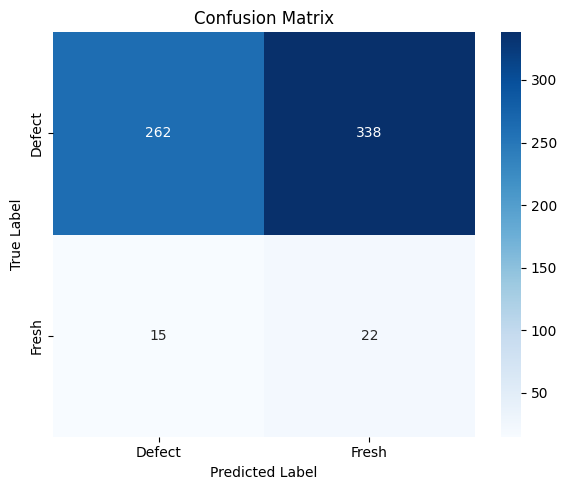

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Average, Maximum
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define dataset directories
train_dir = "dataset_split/train"
val_dir = "dataset_split/val"

# Image parameters
IMG_SIZE = (224, 224)  # Use 224x224 for all models to avoid ValueError
BATCH_SIZE = 32

# Data generators with resizing
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,  # Resize images during training
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,  # Resize images during validation
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Define input layer with explicit shape
input_layer = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))  # Match IMG_SIZE

# Load pre-trained models with defined input shape
resnet = tf.keras.applications.ResNet50(weights="imagenet", include_top=False,
                                       pooling="avg", input_tensor=input_layer)
mobilenet = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False,
                                             pooling="avg", input_tensor=input_layer)
vgg = tf.keras.applications.VGG16(weights="imagenet", include_top=False,
                                   pooling="avg", input_tensor=input_layer)
# If you want to include InceptionV3, ensure IMG_SIZE is (299, 299)
# and change input_layer shape accordingly.
# inception = tf.keras.applications.InceptionV3(weights="imagenet", include_top=False,
#                                             pooling="avg", input_tensor=input_layer)

# Freeze layers to prevent re-training
for model in [resnet, mobilenet, vgg]:  # Include inception if used
    model.trainable = False

# Convert all features to the same size (512)
resnet_features = Dense(512, activation="relu")(resnet.output)
mobilenet_features = Dense(512, activation="relu")(mobilenet.output)
vgg_features = Dense(512, activation="relu")(vgg.output)
# inception_features = Dense(512, activation="relu")(inception.output)  # If inception is used

# Combine outputs using averaging
# Include inception_features in the list if used
merged_output = Maximum()([resnet_features, mobilenet_features, vgg_features])

# Final dense layer for classification
final_output = Dense(1, activation="sigmoid")(merged_output)

# Create ensemble model
ensemble_model = Model(inputs=input_layer, outputs=final_output)

# Compile model
ensemble_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Save model (optional)
# ensemble_model.save("ensemble_model.h5")

# ... (Rest of your code for prediction and evaluation) ...

# Step 1: Predict on validation set
val_generator.reset()
y_true = val_generator.classes
y_pred_probs = ensemble_model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 2: Classification Report
print("📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Defect", "Fresh"]))

# Step 3: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Defect", "Fresh"],
            yticklabels=["Defect", "Fresh"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token('2rRUQEGHobLlKiAq03dSqiT2MLM_3UJ9UJTWmaufCv9YtvyTi')
#2rLHUDcVjfahXPGevvfWghkz7cI_6gQ6hkqFpMed3dGWPhdV7

In [ ]:
from pyngrok import ngrok

    # Kill all existing ngrok processes
ngrok.kill()

!streamlit run app.py &>/dev/null&

    # Create a public URL using ngrok
public_url = ngrok.connect(addr='localhost:8501')  # Streamlit's default port
print(f"Your Streamlit app is available at: {public_url}")

FLask API
